# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [MOKHAMAD NUR FAIZIN]
- **Email:** [nurfaiz730@gmail.com]
- **ID Dicoding:** [nurfaiz730]

## Menentukan Pertanyaan Bisnis

1. Kapan Puncak Waktu Penyewaan Sepeda?
2. Bagaimana Korelasi Antara Kondisi Cuaca dan Jumlah Sepeda yang Disewa?

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

## Data Wrangling

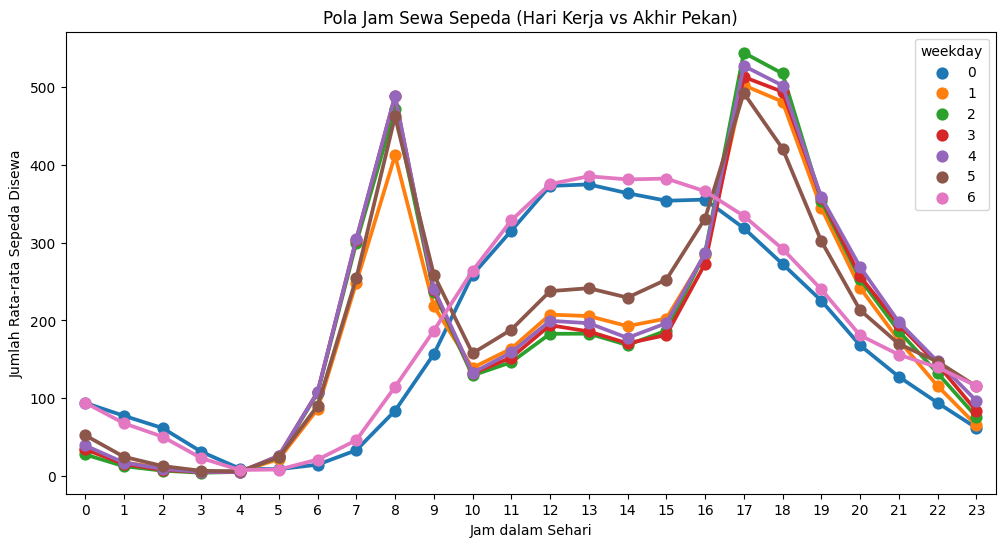

In [27]:
# URL GitHub
url = "https://raw.githubusercontent.com/nurfaiz730/Proyek_Analisis_Data/main/hour.csv"
data1 = "hour_data.csv"

# Mengambil data dari GitHub dan menyimpannya sebagai file CSV lokal
data = pd.read_csv(url)
data.to_csv(data1, index=False)

# Eksplorasi dan pemilihan variabel yang diperlukan
selected_cols = ['hr', 'cnt', 'weekday']
df = data[selected_cols]

# Group by jam dan hari kerja/akhir pekan
hourly_rentals = df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.pointplot(data=hourly_rentals, x='hr', y='cnt', hue='weekday')
plt.title('Pola Jam Sewa Sepeda (Hari Kerja vs Akhir Pekan)')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Rata-rata Sepeda Disewa')
plt.show()


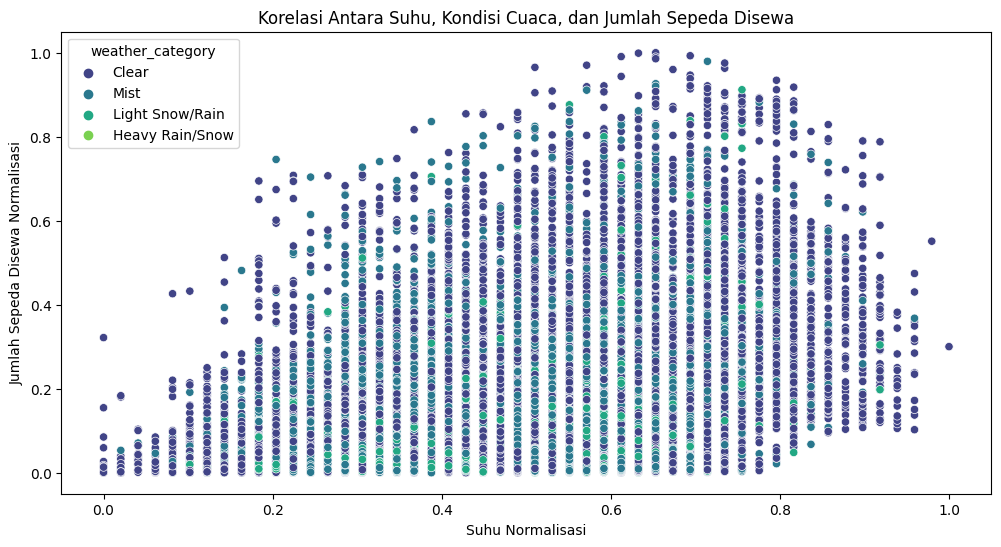

In [28]:
# Eksplorasi dan pemilihan variabel yang diperlukan
selected_cols = ['temp', 'hum', 'weathersit', 'cnt']

# Mendefinisikan fungsi untuk mengkonversi kategori weathersit menjadi numerik
def convert_weather_category(category):
    if category == 1:
        return 'Clear'
    elif category == 2:
        return 'Mist'
    elif category == 3:
        return 'Light Snow/Rain'
    elif category == 4:
        return 'Heavy Rain/Snow'
    else:
        return 'Unknown'

# Menggunakan fungsi apply untuk mengonversi kategori cuaca
data['weather_category'] = data['weathersit'].apply(convert_weather_category)

# Normalisasi variabel
scaler = preprocessing.MinMaxScaler()
data[['temp', 'hum', 'cnt']] = scaler.fit_transform(data[['temp', 'hum', 'cnt']])

# Visualisasi
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temp', y='cnt', hue='weather_category', palette='viridis')
plt.title('Korelasi Antara Suhu, Kondisi Cuaca, dan Jumlah Sepeda Disewa')
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Sepeda Disewa Normalisasi')
plt.show()

### Assessing Data

In [29]:
# Menampilkan informasi umum dataset
print(data.info())

# Mengecek nilai yang hilang
print("Jumlah Nilai Hilang:")
print(data.isnull().sum())

# Mengecek statistik deskriptif untuk variabel utama
print("Statistik Deskriptif:")
print(data[['hr', 'cnt', 'weekday']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           17379 non-null  int64  
 1   dteday            17379 non-null  object 
 2   season            17379 non-null  int64  
 3   yr                17379 non-null  int64  
 4   mnth              17379 non-null  int64  
 5   hr                17379 non-null  int64  
 6   holiday           17379 non-null  int64  
 7   weekday           17379 non-null  int64  
 8   workingday        17379 non-null  int64  
 9   weathersit        17379 non-null  int64  
 10  temp              17379 non-null  float64
 11  atemp             17379 non-null  float64
 12  hum               17379 non-null  float64
 13  windspeed         17379 non-null  float64
 14  casual            17379 non-null  int64  
 15  registered        17379 non-null  int64  
 16  cnt               17379 non-null  float6

In [30]:
# Menampilkan informasi umum dataset
print(data.info())

# Mengecek nilai yang hilang
print("Jumlah Nilai Hilang:")
print(data.isnull().sum())

# Mengecek statistik deskriptif untuk variabel utama
print("Statistik Deskriptif:")
print(data[['temp', 'hum', 'weathersit', 'cnt']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           17379 non-null  int64  
 1   dteday            17379 non-null  object 
 2   season            17379 non-null  int64  
 3   yr                17379 non-null  int64  
 4   mnth              17379 non-null  int64  
 5   hr                17379 non-null  int64  
 6   holiday           17379 non-null  int64  
 7   weekday           17379 non-null  int64  
 8   workingday        17379 non-null  int64  
 9   weathersit        17379 non-null  int64  
 10  temp              17379 non-null  float64
 11  atemp             17379 non-null  float64
 12  hum               17379 non-null  float64
 13  windspeed         17379 non-null  float64
 14  casual            17379 non-null  int64  
 15  registered        17379 non-null  int64  
 16  cnt               17379 non-null  float6

### Cleaning Data

In [31]:
# Drop kolom yang tidak diperlukan
data = data.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], axis=1)

# Mengisi nilai yang hilang (jika ada)
data = data.fillna(0)

# Memastikan tipe data yang sesuai
data['weekday'] = data['weekday'].astype('category')
data['hr'] = data['hr'].astype('category')

# Menyimpan data yang sudah dibersihkan
data.to_csv('cleaned_hourly_data.csv', index=False)

In [32]:
# URL GitHub
url = "https://raw.githubusercontent.com/nurfaiz730/Proyek_Analisis_Data/main/hour.csv"
data1 = "hour_data.csv"

# Mengambil data dari GitHub dan menyimpannya sebagai file CSV lokal
data = pd.read_csv(url)
data.to_csv(data1, index=False)

# Mengisi nilai yang hilang (jika ada)
data = data.fillna(0)

# Normalisasi variabel
scaler = preprocessing.MinMaxScaler()
data[['temp', 'hum', 'cnt']] = scaler.fit_transform(data[['temp', 'hum', 'cnt']])

# Menyimpan data yang sudah dibersihkan
data.to_csv('cleaned_hourly_data.csv', index=False)


## Exploratory Data Analysis (EDA)

### Explore ...

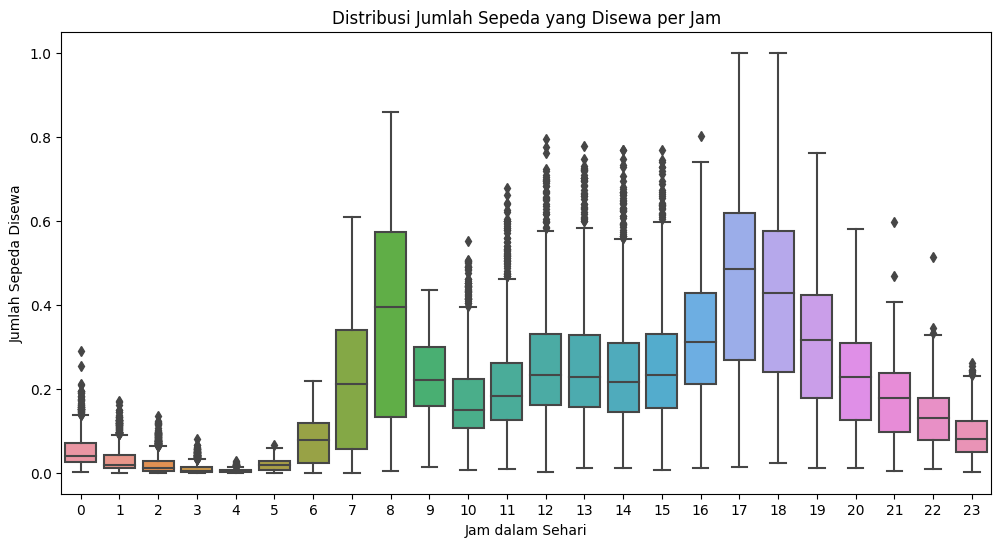

In [33]:
# URL GitHub
url_cleaned_hourly_data = "https://raw.githubusercontent.com/nurfaiz730/Proyek_Analisis_Data/main/cleaned_hourly_data.csv"

# Load data dari GitHub
data = pd.read_csv(url_cleaned_hourly_data)

# Visualisasi distribusi jumlah sepeda yang disewa per jam
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=data)
plt.title('Distribusi Jumlah Sepeda yang Disewa per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Sepeda Disewa')
plt.show()

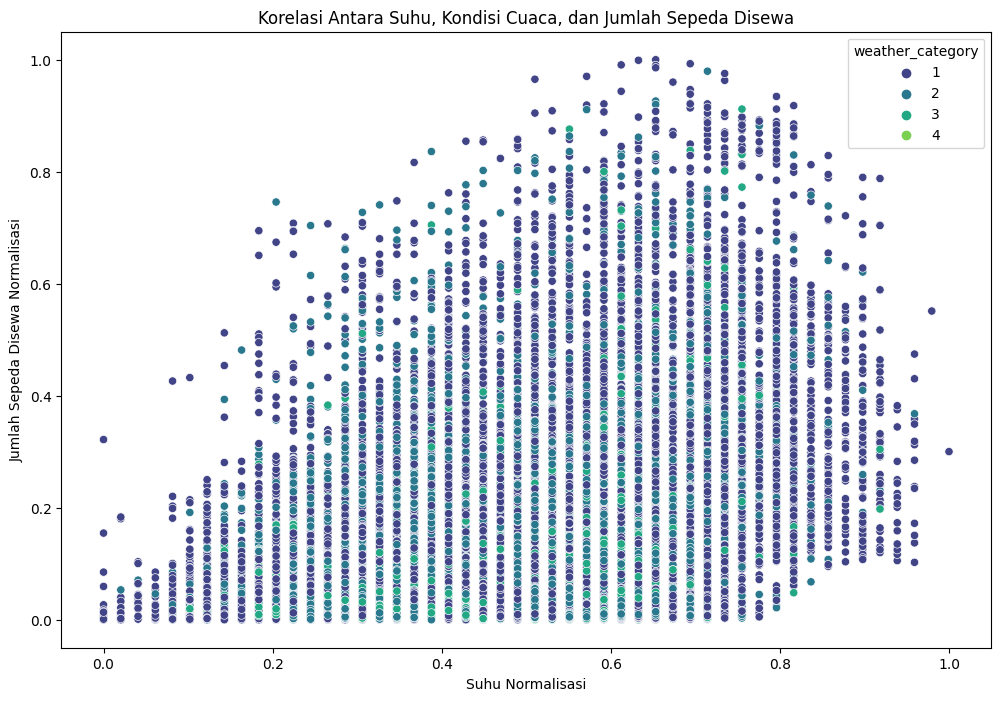

In [34]:
# URL GitHub
url_cleaned_hourly_data = "https://raw.githubusercontent.com/nurfaiz730/Proyek_Analisis_Data/main/cleaned_hourly_data.csv"

# Load data dari GitHub
data = pd.read_csv(url_cleaned_hourly_data)

# Konversi tipe data weather_category menjadi kategori
data['weather_category'] = data['weathersit'].astype('category')

# Visualisasi korelasi antara suhu, kelembapan, dan jumlah sepeda yang disewa
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='temp', y='cnt', hue='weather_category', palette='viridis')
plt.title('Korelasi Antara Suhu, Kondisi Cuaca, dan Jumlah Sepeda Disewa')
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Sepeda Disewa Normalisasi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

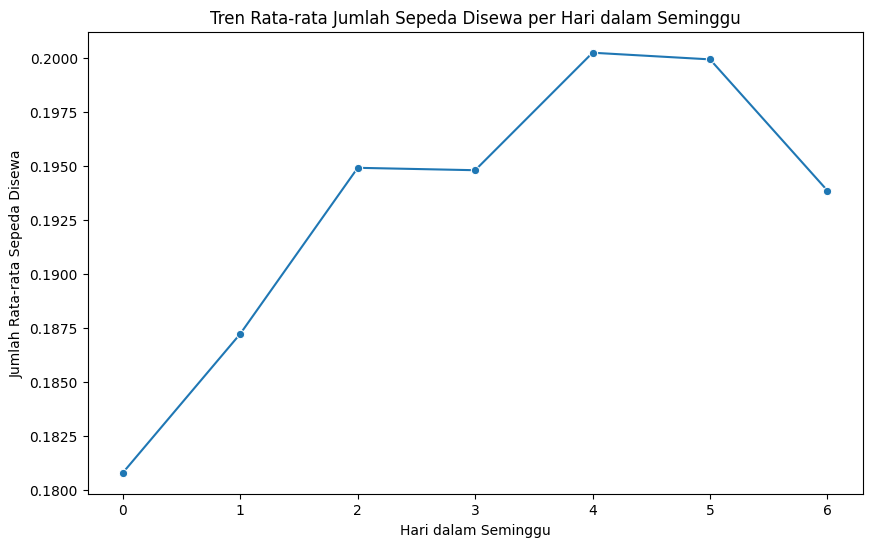

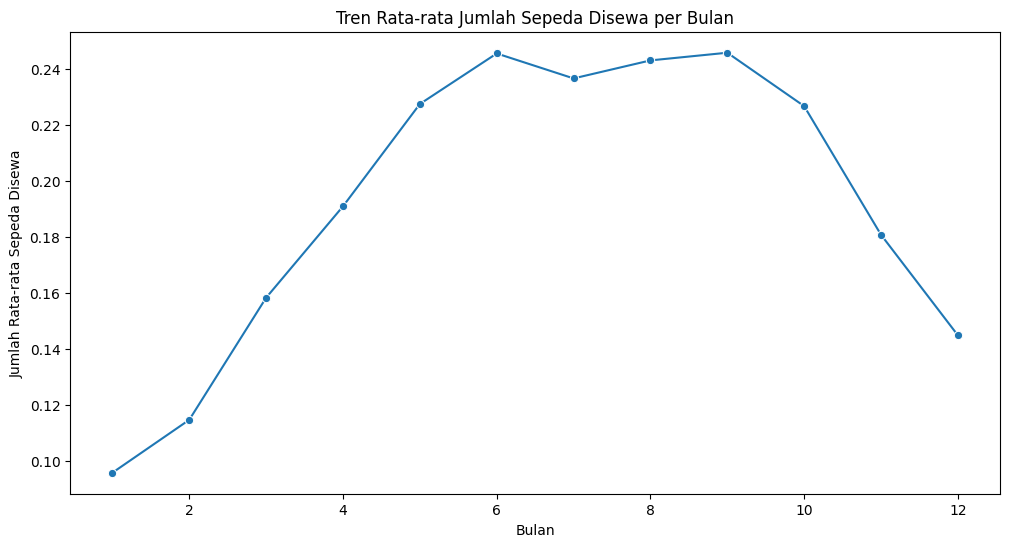

In [35]:
# URL GitHub
url_cleaned_hourly_data = "https://raw.githubusercontent.com/nurfaiz730/Proyek_Analisis_Data/main/cleaned_hourly_data.csv"

# Load data dari GitHub
data = pd.read_csv(url_cleaned_hourly_data)

# Visualisasi tren mingguan
weekly_trend = data.groupby('weekday')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='cnt', data=weekly_trend, marker='o')
plt.title('Tren Rata-rata Jumlah Sepeda Disewa per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Rata-rata Sepeda Disewa')
plt.show()

# Visualisasi tren bulanan
monthly_trend = data.groupby('mnth')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_trend, marker='o')
plt.title('Tren Rata-rata Jumlah Sepeda Disewa per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rata-rata Sepeda Disewa')
plt.show()


### Pertanyaan 2:

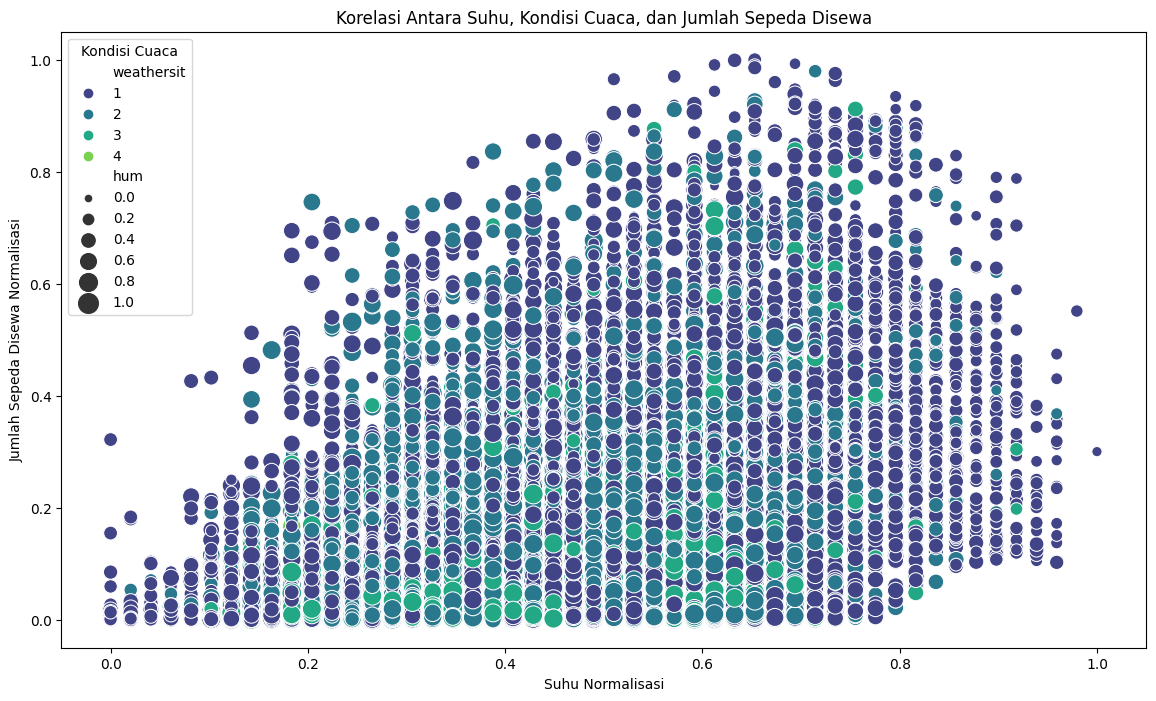

In [36]:
# URL GitHub
url_cleaned_hourly_data = "https://raw.githubusercontent.com/nurfaiz730/Proyek_Analisis_Data/main/cleaned_hourly_data.csv"

# Load data dari GitHub
data = pd.read_csv(url_cleaned_hourly_data)

# Konversi tipe data weather_category menjadi kategori
data['weathersit'] = data['weathersit'].astype('category')

# Visualisasi korelasi antara suhu, kelembapan, dan jumlah sepeda yang disewa dengan hue berdasarkan kondisi cuaca
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='temp', y='cnt', hue='weathersit', palette='viridis', size='hum', sizes=(20, 200))
plt.title('Korelasi Antara Suhu, Kondisi Cuaca, dan Jumlah Sepeda Disewa')
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Sepeda Disewa Normalisasi')
plt.legend(title='Kondisi Cuaca')
plt.show()


## Conclusion

1. Puncak Penyewaan terjadi pada sore hari pukul 17.00 - 18.00 pada hari kerja yaitu jam jam pulang kerja namun pada akhir pekan pola puncaknya lebih merata sepanjang hari.

2. Suhu tinggi, jumlah sepeda yang disewa cenderung tinggi.
Cuaca cerah, jumlah sepeda yang disewa lebih tinggi.
Kelembapan dapat berdampak yang signifikan terhadap jumlah sepeda yang disewa.

In [ ]:
from google.colab import files

# Pindahkan file ke folder 'content'
!mv cleaned_hourly_data.csv /content

# Unduh file ke perangkat lokal
files.download('/content/cleaned_hourly_data.csv')


mv: 'cleaned_hourly_data.csv' and '/content/cleaned_hourly_data.csv' are the same file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install reqs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.8/480.8 kB 7.6 MB/s eta 0:00:00


In [ ]:
!pip freeze > requirements.txt


In [ ]:
from google.colab import files

files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>